In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import random
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense ,Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
da = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BTC_USD_2013-10-01_2021-03-30.csv')
da.head()
dataset = da.copy()
dataset_labels = dataset.pop('Closing Price (USD)')
dataset = np.array(dataset_labels)

sc = MinMaxScaler(feature_range=(0,1))
dataset = dataset.reshape(-1, 1)
dataset_scaled = sc.fit_transform(dataset)

In [ ]:
X = []
Y = []
n_future = 1 # next 1 days forecast
n_past = 30 # Past 30 days 
for i in range(0,len(dataset_scaled)-n_past-n_future+1):
    X.append(dataset_scaled[i : i + n_past , 0])     
    Y.append(dataset_scaled[i + n_past : i + n_past + n_future , 0 ])
X , Y = np.array(X), np.array(Y)
X = np.reshape(X, (X.shape[0] , X.shape[1], 1) )

In [ ]:
print(X[0:1])

[[[0.00024854]
  [0.00027823]
  [0.        ]
  [0.0001664 ]
  [0.00021034]
  [0.00019907]
  [0.00021787]
  [0.00023828]
  [0.00025504]
  [0.00028658]
  [0.00027534]
  [0.00028602]
  [0.00029354]
  [0.00043964]
  [0.00040602]
  [0.00056368]
  [0.00048386]
  [0.00056679]
  [0.00072512]
  [0.00085354]
  [0.00091912]
  [0.00113877]
  [0.00131464]
  [0.00151922]
  [0.00118365]
  [0.00109586]
  [0.00113981]
  [0.00129588]
  [0.00138818]
  [0.00146476]]]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.01)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.01)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=30, input_shape = (X_train.shape[1],1), return_sequences=True ))

model.add(SimpleRNN(units= 30, return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units= 30, return_sequences=True))
model.add(Dropout(0.2))

model.add(SimpleRNN(units= 30))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['acc'])

history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32 )

model.summary()

Epoch 1/100
83/83 [==============================] - 5s 32ms/step - loss: 0.1819 - acc: 2.3862e-04 - val_loss: 0.0064 - val_acc: 0.0000e+00
Epoch 2/100
83/83 [==============================] - 2s 23ms/step - loss: 0.0317 - acc: 3.0229e-04 - val_loss: 0.0011 - val_acc: 0.0000e+00
Epoch 3/100
83/83 [==============================] - 2s 26ms/step - loss: 0.0176 - acc: 4.0438e-04 - val_loss: 5.6983e-04 - val_acc: 0.0000e+00
Epoch 4/100
83/83 [==============================] - 2s 23ms/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 2.7123e-04 - val_acc: 0.0000e+00
Epoch 5/100
83/83 [==============================] - 2s 24ms/step - loss: 0.0064 - acc: 1.2436e-04 - val_loss: 3.4381e-04 - val_acc: 0.0000e+00
Epoch 6/100
83/83 [==============================] - 2s 25ms/step - loss: 0.0043 - acc: 2.2227e-04 - val_loss: 1.9337e-04 - val_acc: 0.0000e+00
Epoch 7/100
83/83 [==============================] - 2s 23ms/step - loss: 0.0042 - acc: 3.0229e-04 - val_loss: 9.0675e-04 - val_acc: 0.0000e+00


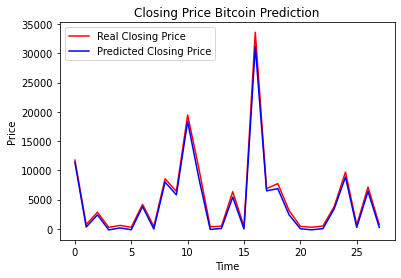

[[  737.4025    ]
 [ 2846.00625   ]
 [  248.25333   ]
 [  583.62375   ]
 [  265.3955    ]
 [ 4186.78374   ]
 [  400.47166   ]
 [ 8562.30747044]
 [ 6392.17933738]
 [19464.53170456]
 [10268.58198473]
 [  349.138     ]
 [  452.14829   ]
 [ 6343.89219996]]
[[  312.0069  ]
 [ 2388.378   ]
 [ -186.6994  ]
 [  153.64717 ]
 [ -154.31621 ]
 [ 3810.8074  ]
 [  -34.414078]
 [ 7999.8613  ]
 [ 5808.0435  ]
 [18373.287   ]
 [ 8606.033   ]
 [  -99.70406 ]
 [   57.93735 ]
 [ 5422.6724  ]]


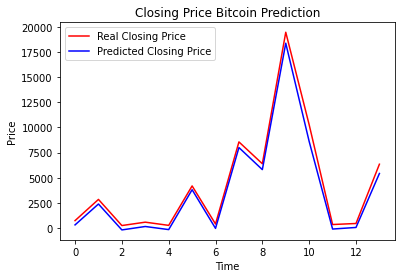

In [ ]:
predict = model.predict(X_test)

plt.plot(sc.inverse_transform(Y_test), color = 'red', label = 'Real Closing Price')
plt.plot(sc.inverse_transform(predict), color = 'blue', label = 'Predicted Closing Price')
plt.title('Closing Price Bitcoin Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.plot(sc.inverse_transform(Y_test[1:15]), color = 'red', label = 'Real Closing Price')
plt.plot(sc.inverse_transform(predict[1:15]), color = 'blue', label = 'Predicted Closing Price')
plt.title('Closing Price Bitcoin Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
print(sc.inverse_transform(Y_test[1:15]))
print(sc.inverse_transform(predict[1:15]))
plt.show()